## Problem Statement: 
Salaries in the field of data professions vary widely based on factors such as experience, job role, and 
performance. Accurately predicting salaries for data professionals is essential for both job seekers and 
employers

### Dataset Overview: 
The dataset contains the following columns: 
 
1. `FIRST NAME`: First name  
2. `LAST NAME`: Last name  
3. `SEX`: Gender  
4. `DOJ`: Date of joining the company 
5. `CURRENT DATE`: Current date of data 
6. `DESIGNATION`: Job role/designation  
7. `AGE`: Age  
8. `SALARY`: Target variable, the salary of the data professional 
9. `UNIT`: Business unit or department  
10. `LEAVES USED`: Number of leaves used  
11. `LEAVES REMAINING`: Number of leaves remaining  
12. `RATINGS`: Ratings or performance ratings  
13. `PAST EXP`: Past work experience

## 1. Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Salary Prediction of Data Professions.csv')
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


Since name of the person has nothing to do with his salary, we are going to remove these columns from our dataset

In [3]:
df=df.drop(columns=['FIRST NAME','LAST NAME'])
df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In the next step we will handle the missing values in our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEX               2639 non-null   object 
 1   DOJ               2638 non-null   object 
 2   CURRENT DATE      2639 non-null   object 
 3   DESIGNATION       2639 non-null   object 
 4   AGE               2636 non-null   float64
 5   SALARY            2639 non-null   int64  
 6   UNIT              2639 non-null   object 
 7   LEAVES USED       2636 non-null   float64
 8   LEAVES REMAINING  2637 non-null   float64
 9   RATINGS           2637 non-null   float64
 10  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 226.9+ KB


In [5]:
df.isnull().sum()

SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

This shows us our dataset contains a very small number of null values, so small that we can just drop and ignore them. 

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

After handling missing values let's see the statistical insights of the data.

In [8]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000
mean,24.753799,58114.079787,22.497720,7.502280,3.486702,1.562310
std,3.904332,36861.179041,4.602397,4.602397,1.114081,2.725625
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46783.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51390.750000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [9]:
numericdf = df.select_dtypes(include=['float64','int64'])
corl= numericdf.corr()
corl

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
AGE,1.000000,0.871904,0.007287,-0.007287,0.039005,0.903671
SALARY,0.871904,1.000000,0.006902,-0.006902,0.021656,0.854016
LEAVES USED,0.007287,0.006902,1.000000,-1.000000,0.004256,0.007950
LEAVES REMAINING,-0.007287,-0.006902,-1.000000,1.000000,-0.004256,-0.007950
RATINGS,0.039005,0.021656,0.004256,-0.004256,1.000000,0.042392
PAST EXP,0.903671,0.854016,0.007950,-0.007950,0.042392,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

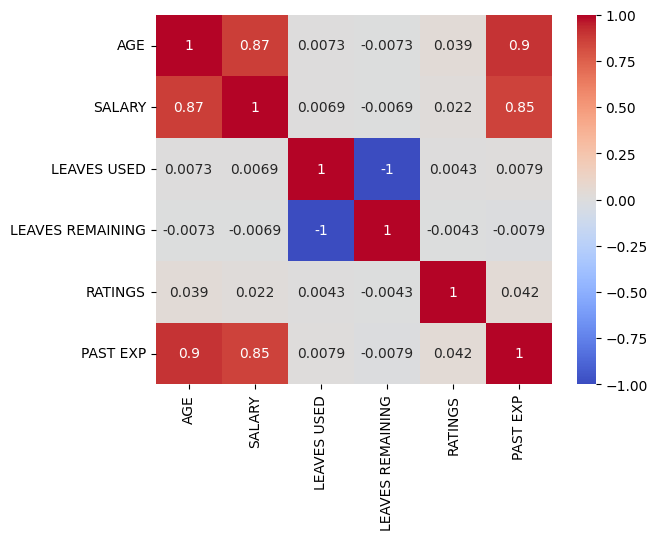

In [10]:
sns.heatmap(corl , annot=True, cmap='coolwarm')
plt.show

We can see **Age** and **Salary** are highly correlated because **Age** and **Past EXP** are also coorelated. This is because **Past experience** is a major factor when deciding salary of the staff. 

Lets uncover what each age and expirence groups earn.

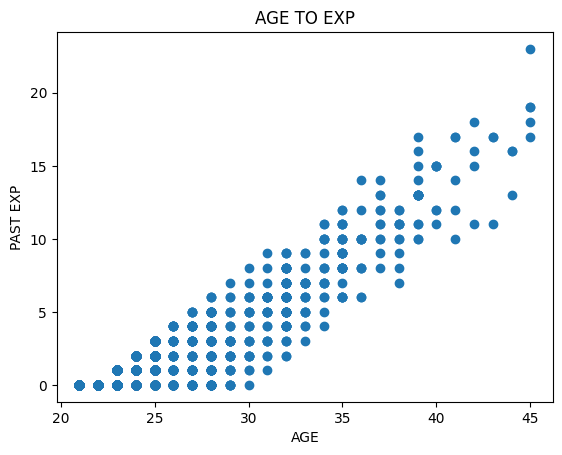

In [11]:
plt.scatter(df['AGE'], df['PAST EXP'])
plt.title('AGE TO EXP')
plt.xlabel('AGE')
plt.ylabel('PAST EXP')
plt.show()

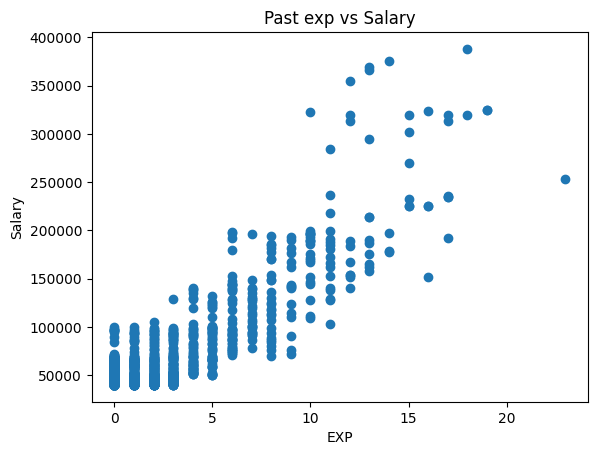

In [12]:
plt.scatter(df['PAST EXP'], df['SALARY'])
plt.title('Past exp vs Salary')
plt.xlabel('EXP')
plt.ylabel('Salary')
plt.show()

We cam see that the past expirence gradually rises with the age and so does the salary

Lets see how salary varies with department.

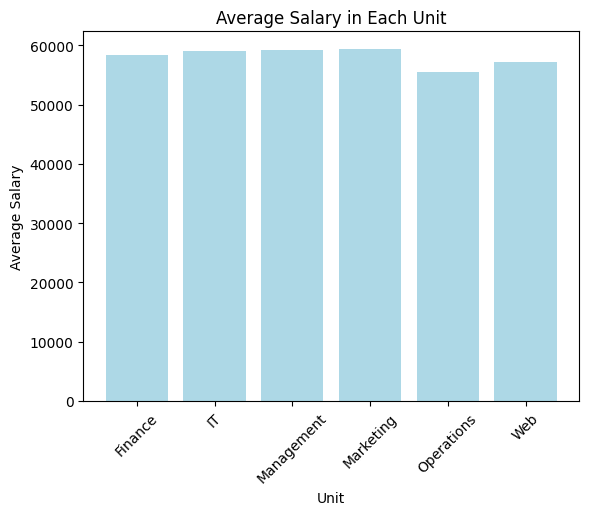

In [13]:
average_salary = df.groupby('UNIT')['SALARY'].mean().reset_index()

# Create bar plot
plt.bar(average_salary['UNIT'], average_salary['SALARY'], color='lightblue')
plt.title('Average Salary in Each Unit')
plt.xlabel('Unit')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

Seems like the departments dont play any major role in salary difference.

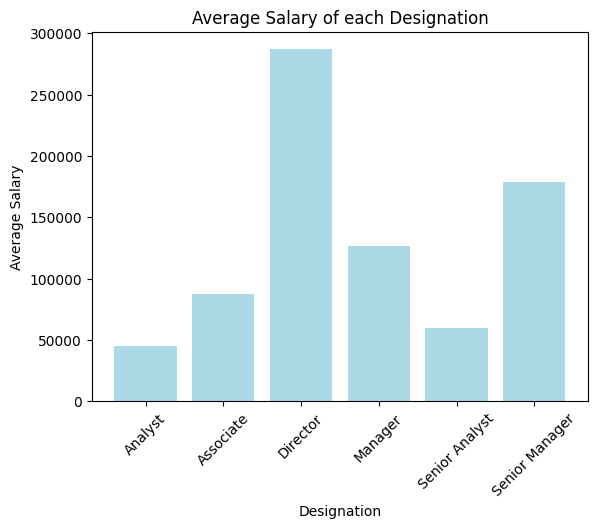

In [14]:
average_salary = df.groupby('DESIGNATION')['SALARY'].mean().reset_index()

# Create bar plot
plt.bar(average_salary['DESIGNATION'], average_salary['SALARY'], color='lightblue')
plt.title('Average Salary of each Designation')
plt.xlabel('Designation')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

This shows designations plays vital role in salary gap.

#### Typecasting
First we will fix the datatypes of the columns. For example `DOJ` is in `Object` type, we willl convertit into `datetime`.

In [15]:
df['DOJ']=pd.to_datetime(df['DOJ'])
df['CURRENT DATE']=pd.to_datetime(df['CURRENT DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2632 entries, 0 to 2638
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SEX               2632 non-null   object        
 1   DOJ               2632 non-null   datetime64[ns]
 2   CURRENT DATE      2632 non-null   datetime64[ns]
 3   DESIGNATION       2632 non-null   object        
 4   AGE               2632 non-null   float64       
 5   SALARY            2632 non-null   int64         
 6   UNIT              2632 non-null   object        
 7   LEAVES USED       2632 non-null   float64       
 8   LEAVES REMAINING  2632 non-null   float64       
 9   RATINGS           2632 non-null   float64       
 10  PAST EXP          2632 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 246.8+ KB


## 2. Feature Engineering: 

Before getting started we have to split the dataset into train/test sets for evaluation purposes later on. 

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['SALARY'])  # Features
y = df['SALARY']  # Target variable

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 1193 to 867
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SEX               2105 non-null   object        
 1   DOJ               2105 non-null   datetime64[ns]
 2   CURRENT DATE      2105 non-null   datetime64[ns]
 3   DESIGNATION       2105 non-null   object        
 4   AGE               2105 non-null   float64       
 5   UNIT              2105 non-null   object        
 6   LEAVES USED       2105 non-null   float64       
 7   LEAVES REMAINING  2105 non-null   float64       
 8   RATINGS           2105 non-null   float64       
 9   PAST EXP          2105 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 180.9+ KB


As current date is same for everyone it serves us no purpose. But it can give us some other valueable info which can be used to create new column. We will create a `SERVICE` column which represents how much time an employee spent in the company.

In [18]:
X_train['SERVICE']=(X_train['CURRENT DATE'] - X_train['DOJ']).dt.days
X_test['SERVICE']=(X_test['CURRENT DATE'] - X_test['DOJ']).dt.days

X_train.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SERVICE
1193,M,2013-02-05,2016-01-07,Analyst,22.0,Marketing,26.0,4.0,4.0,0,1066
2541,M,2014-04-04,2016-01-07,Analyst,24.0,Management,17.0,13.0,4.0,1,643
571,F,2013-05-16,2016-01-07,Analyst,23.0,Marketing,30.0,0.0,4.0,0,966
489,F,2014-06-02,2016-01-07,Analyst,25.0,IT,15.0,15.0,5.0,2,584
1849,M,2013-06-24,2016-01-07,Analyst,25.0,Operations,15.0,15.0,4.0,1,927


After service column is introduced there is no need to keep `DOJ` & `CURRENT DATE`. We shall drop them too.

In [19]:
X_train=X_train.drop(columns=['CURRENT DATE','DOJ'])
X_test=X_test.drop(columns=['CURRENT DATE','DOJ'])
X_train.head()

,SEX,DESIGNATION,AGE,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SERVICE
1193,M,Analyst,22.0,Marketing,26.0,4.0,4.0,0,1066
2541,M,Analyst,24.0,Management,17.0,13.0,4.0,1,643
571,F,Analyst,23.0,Marketing,30.0,0.0,4.0,0,966
489,F,Analyst,25.0,IT,15.0,15.0,5.0,2,584
1849,M,Analyst,25.0,Operations,15.0,15.0,4.0,1,927


In [20]:
from sklearn.preprocessing import OneHotEncoder

s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['SEX', 'DESIGNATION', 'UNIT']


In [21]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test= pd.concat([num_X_test, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_test.columns = OH_X_test.columns.astype(str)


c:\Users\Syed Taha Rizvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 3. Model training:
The given problem is a regression task as it requires prediction of salary. To do that we can use Random Forest model as it works really well in this kind of situations.

In [25]:
#1. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(OH_X_train, y_train)
preds = model.predict(OH_X_test)
mape = np.mean(np.abs((y_test - preds) / y_test)) * 100
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test , preds)
    

## 4. Model Validation:

In [26]:
print("Model prediction results:") 
print (f"The model on average is off by {mae} in it's prediction of salaries.")
print (f"The average error is {mape} % of the actual values.")
print (f"Over all model fitness is {r2*100} % based on the coefficient of determination.")

Model prediction results:
The model on average is off by 4070.8476976597094 in it's prediction of salaries.
The average error is 6.239289248099714 % of the actual values.
Over all model fitness is 96.83133482933451 % based on the coefficient of determination.
